<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#CNN-Review" data-toc-modified-id="CNN-Review-1">CNN Review</a></span></li><li><span><a href="#RNN-&amp;-LSTM" data-toc-modified-id="RNN-&amp;-LSTM-2">RNN &amp; LSTM</a></span></li><li><span><a href="#LSTM-주식가격-예측" data-toc-modified-id="LSTM-주식가격-예측-3">LSTM 주식가격 예측</a></span></li><li><span><a href="#Bidrectional" data-toc-modified-id="Bidrectional-4">Bidrectional</a></span></li><li><span><a href="#다음-문자-예측" data-toc-modified-id="다음-문자-예측-5">다음 문자 예측</a></span></li><li><span><a href="#Embedding-(영화-리뷰-데이터)" data-toc-modified-id="Embedding-(영화-리뷰-데이터)-6">Embedding (영화 리뷰 데이터)</a></span></li></ul></div>

# CNN Review

In [2]:
import tensorflow as tf
tf.__version__

'1.13.1'

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape)

# one-hot encoding : categorical data(범주형 데이터) 변환
# 데이터의 차원은 데이터의 변수의 수를 의미
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

print(x_train.shape, y_train.shape)
print(y_train.shape, y_test.shape)

(60000, 28, 28) (60000,)
(60000, 784) (60000, 10)
(60000, 10) (10000, 10)


In [4]:
X = tf.keras.layers.Input(shape=(784,))
net = tf.keras.layers.Dense(64)(X)
net = tf.keras.layers.Activation('relu')(net)
net = tf.keras.layers.Dense(10)(net)
Y = tf.keras.layers.Activation('softmax')(net)

model = tf.keras.models.Model(X, Y)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.fit(x_train, y_train, epochs=10, batch_size=256)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 1s 16us/sample - loss: 8.4963 - acc: 0.4665
Epoch 2/10
60000/60000 [==============================] - 1s 15us/sample - loss: 7.4817 - acc: 0.5324
Epoch 3/10
60000/60000 [==============================] - 1s 14us/sample - loss: 7.2822 - acc: 0.5455
Epoch 4/10
60000/60000 [==============================] - 1s 14us/sample - loss: 5.0356 - acc: 0.6836
Epoch 5/10
60000/60000 [==============================] - 1s 14us/sample - loss: 3.9873 - acc: 0.7494
Epoch 6/10
60000/60000 [==============================] - 1s 13us/sample - loss: 3.8821 - acc: 0.7562
Epoch 7/10
60000/60000 [==============================] - 1s 14us/sample - loss: 3.8197 - acc: 0.7604
Epoch 8/10
60000/60000 [==============================] - 1s 14us/sample - loss: 3.7753 - acc: 0.7635
Epoch 9/10
60000/60000 [==============================] - 1s 16us/sample - loss: 3.7821 - acc: 0.7630
Epoch 10/10
60000/60000 [=========

In [7]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 37us/sample - loss: 2.2703 - acc: 0.8570


[2.2703229776382448, 0.857]

# RNN & LSTM

### RNN MNIST

In [8]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape)

x_train = x_train / 255.
x_test = x_test / 255.

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

(60000, 28, 28) (60000,)


In [9]:
# cell = tf.keras.layers.SimpleRNNCell(32)
cell = tf.keras.layers.LSTMCell(32)

X = tf.keras.layers.Input(shape=(28,28))
net = tf.keras.layers.RNN(cell)(X)
net = tf.keras.layers.Dense(10)(net)
Y = tf.keras.layers.Activation('softmax')(net)

model = tf.keras.models.Model(X, Y)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
rnn (RNN)                    (None, 32)                7808      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 8,138
Trainable params: 8,138
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(x_train, y_train, epochs=10, batch_size=256)

Epoch 1/10
60000/60000 [==============================] - 9s 142us/sample - loss: 1.3054 - acc: 0.5905
Epoch 2/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.4307 - acc: 0.8764
Epoch 3/10
60000/60000 [==============================] - 9s 156us/sample - loss: 0.2744 - acc: 0.9228
Epoch 4/10
60000/60000 [==============================] - 9s 145us/sample - loss: 0.2156 - acc: 0.9389
Epoch 5/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.1794 - acc: 0.9499s - loss: 0.1809 - ac - ETA: 0s - loss: 0.1790 - acc: 
Epoch 6/10
60000/60000 [==============================] - 8s 140us/sample - loss: 0.1590 - acc: 0.9547
Epoch 7/10
60000/60000 [==============================] - 9s 152us/sample - loss: 0.1434 - acc: 0.9592
Epoch 8/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.1275 - acc: 0.9634
Epoch 9/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.1171 - acc: 0.9661
Epoch 10/10
60000/6

In [12]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 143us/sample - loss: 0.1045 - acc: 0.9701


[0.10454955465942621, 0.9701]

### LSTM MNIST

In [13]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape)

# minmax normalize
x_train = x_train / 255.
x_test = x_test / 255.

# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(60000, 28, 28) (60000, 10)
(10000, 28, 28) (10000, 10)


In [14]:
# cell = tf.keras.layers.SimpleRNNCell(64)
cell = tf.keras.layers.LSTMCell(64)

X = tf.keras.layers.Input(shape=(28,28))
net = tf.keras.layers.RNN(cell)(X)
net = tf.keras.layers.Dense(10)(net)
Y = tf.keras.layers.Activation('softmax')(net)

model = tf.keras.models.Model(X, Y)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
rnn_1 (RNN)                  (None, 64)                23808     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 24,458
Trainable params: 24,458
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(x_train, y_train, epochs=10, batch_size=256)

Epoch 1/10
60000/60000 [==============================] - 11s 191us/sample - loss: 0.9727 - acc: 0.6886 - loss
Epoch 2/10
60000/60000 [==============================] - 12s 196us/sample - loss: 0.2750 - acc: 0.9189 - loss: 0.2781 - 
Epoch 3/10
60000/60000 [==============================] - 12s 193us/sample - loss: 0.1871 - acc: 0.9452 - loss: 0.1887
Epoch 4/10
60000/60000 [==============================] - 13s 212us/sample - loss: 0.1462 - acc: 0.9565 - loss
Epoch 5/10
60000/60000 [==============================] - 14s 227us/sample - loss: 0.1201 - acc: 0.9646 - loss: 0.1201 - 
Epoch 6/10
60000/60000 [==============================] - 12s 199us/sample - loss: 0.1087 - acc: 0.9679
Epoch 7/10
60000/60000 [==============================] - 11s 183us/sample - loss: 0.0921 - acc: 0.9731
Epoch 8/10
60000/60000 [==============================] - 14s 240us/sample - loss: 0.0814 - acc: 0.9760
Epoch 9/10
60000/60000 [==============================] - 15s 253us/sample - loss: 0.0746 - acc: 0.9776

In [17]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 279us/sample - loss: 0.0768 - acc: 0.9765


[0.07682504710964859, 0.9765]

# LSTM 주식가격 예측

In [18]:
import pandas as pd

In [19]:
dataset = pd.read_csv("https://raw.githubusercontent.com/blackdew/DeepLearningZeroToAll/master/data-02-stock_daily.csv", skiprows=1)
dataset.head()
print(dataset.shape)

# minmax norm
data_norm = (dataset - dataset.min(axis=0)) / (dataset.max(axis=0) - dataset.min(axis=0))
data_norm.tail()

(732, 5)


,# Open,High,Low,Volume,Close
727,0.306974,0.314634,0.218994,0.012476,0.216982
728,0.186679,0.209481,0.208782,0.000000,0.217448
729,0.210516,0.205289,0.203559,0.000260,0.187750
730,0.193935,0.203642,0.208665,0.002985,0.196552
731,0.213751,0.208180,0.191792,0.000466,0.192092


In [20]:
dataset

,# Open,High,Low,Volume,Close
0,828.659973,833.450012,828.349976,1247700,831.659973
1,823.020020,828.070007,821.655029,1597800,828.070007
2,819.929993,824.400024,818.979980,1281700,824.159973
3,819.359985,823.000000,818.469971,1304000,818.979980
4,819.000000,823.000000,816.000000,1053600,820.450012
...,...,...,...,...,...
727,599.992707,604.832763,562.192568,147100,567.002574
728,558.712504,568.452595,558.712504,7900,567.162558
729,566.892592,567.002574,556.932537,10800,556.972503
730,561.202549,566.432590,558.672539,41200,559.992565


In [21]:
data_norm_df = data_norm

In [22]:
data_norm = data_norm.values[::-1]  # array reverse

data_norm[:5]

array([[2.13751054e-01, 2.08179810e-01, 1.91791832e-01, 4.66075110e-04,
        1.92092403e-01],
       [1.93935034e-01, 2.03641926e-01, 2.08664571e-01, 2.98467330e-03,
        1.96551555e-01],
       [2.10516454e-01, 2.05289413e-01, 2.03558748e-01, 2.59926504e-04,
        1.87749731e-01],
       [1.86678765e-01, 2.09480567e-01, 2.08781843e-01, 0.00000000e+00,
        2.17448151e-01],
       [3.06973882e-01, 3.14634137e-01, 2.18993665e-01, 1.24764722e-02,
        2.16981885e-01]])

axis는 shape의 인덱스 순번과 동일함(sum, min, max 등을 연산하면 axis로 지정한 인덱스의 원소가 1개가 됨) <br>
shape가 (732, 5) 일때, axis=0은 732개의 행을 1개로 만듦. axis=1은 5개의 열을 1개로 만듦

In [23]:
import numpy as np

# x_train = []
# for i in range(len(data_norm) - 7):
#     x_train.append(data_norm[i:i+7])

# 과거 7일간의 주가로 그 다음날의 주가를 예측하기 위한 데이터 전처리
x_train = np.array([data_norm[i:i+7] for i in range(len(data_norm) - 7)])

x_train = np.array(x_train)
print(x_train.shape)

y_train = []
y_train = np.array([data_norm[i+7, -1] for i in range(len(data_norm) - 7)])
print(y_train.shape)

(725, 7, 5)
(725,)


In [24]:
x_test, x_train = x_train[-200:], x_train[:-200]
y_test, y_train = y_train[-200:], y_train[:-200]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(525, 7, 5) (525,)
(200, 7, 5) (200,)


In [25]:
cell = tf.keras.layers.LSTMCell(64)

X = tf.keras.layers.Input(shape=(7,5))
net = tf.keras.layers.RNN(cell)(X)
Y = tf.keras.layers.Dense(1)(net)   # 회귀이기 때문에 1개의 값을 결과로 가짐

model = tf.keras.models.Model(X, Y)
model.compile(
    optimizer='adam',
    loss='mse'    # 회귀에는 loss 함수로 mse 사용
)

Instructions for updating:
Use tf.cast instead.


In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 7, 5)              0         
_________________________________________________________________
rnn_2 (RNN)                  (None, 64)                17920     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 17,985
Trainable params: 17,985
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
525/525 [==============================] - 1s 2ms/sample - loss: 0.1200
Epoch 2/50
525/525 [==============================] - 0s 172us/sample - loss: 0.0115
Epoch 3/50
525/525 [==============================] - 0s 171us/sample - loss: 0.0050
Epoch 4/50
525/525 [==============================] - 0s 194us/sample - loss: 0.0033
Epoch 5/50
525/525 [==============================] - 0s 215us/sample - loss: 0.0029
Epoch 6/50
525/525 [==============================] - 0s 199us/sample - loss: 0.0028
Epoch 7/50
525/525 [==============================] - 0s 205us/sample - loss: 0.0027
Epoch 8/50
525/525 [==============================] - 0s 180us/sample - loss: 0.0027
Epoch 9/50
525/525 [==============================] - 0s 199us/sample - loss: 0.0027
Epoch 10/50
525/525 [==============================] - 0s 180us/sample - loss: 0.0026
Epoch 11/50
525/525 [==============================] - 0s 234us/sample - loss: 0.0026
Epoch 12/50
525/525 [==============================] - 0s 180us/s

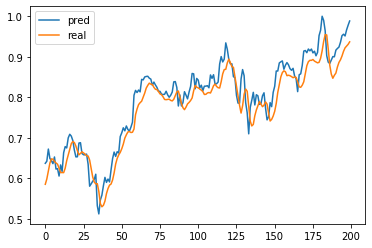

In [28]:
import matplotlib.pyplot as plt

y_pred = model.predict(x_test)

plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['pred', 'real'])
plt.show()

# Bidrectional

In [29]:
cell = tf.keras.layers.LSTMCell(32)
lstm = tf.keras.layers.RNN(cell)

X = tf.keras.layers.Input(shape=(7,5))
net = tf.keras.layers.Bidirectional(lstm)(X)
Y = tf.keras.layers.Dense(1)(net)

model2 = tf.keras.models.Model(X, Y)
model2.compile(
    optimizer='adam',
    loss='mse'
)

In [30]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 7, 5)              0         
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                9728      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 9,793
Trainable params: 9,793
Non-trainable params: 0
_________________________________________________________________


In [31]:
model2.fit(x_train, y_train, epochs=50)

Epoch 1/50
525/525 [==============================] - 2s 3ms/sample - loss: 0.0929
Epoch 2/50
525/525 [==============================] - 0s 190us/sample - loss: 0.0133
Epoch 3/50
525/525 [==============================] - 0s 199us/sample - loss: 0.0055
Epoch 4/50
525/525 [==============================] - 0s 194us/sample - loss: 0.0033
Epoch 5/50
525/525 [==============================] - 0s 182us/sample - loss: 0.0027
Epoch 6/50
525/525 [==============================] - 0s 230us/sample - loss: 0.0026
Epoch 7/50
525/525 [==============================] - 0s 262us/sample - loss: 0.0025
Epoch 8/50
525/525 [==============================] - 0s 230us/sample - loss: 0.0025
Epoch 9/50
525/525 [==============================] - 0s 184us/sample - loss: 0.0025
Epoch 10/50
525/525 [==============================] - 0s 186us/sample - loss: 0.0025
Epoch 11/50
525/525 [==============================] - 0s 199us/sample - loss: 0.0024
Epoch 12/50
525/525 [==============================] - 0s 167us/s

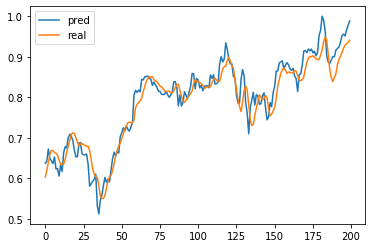

In [32]:
y_pred = model2.predict(x_test)

plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['pred', 'real'])
plt.show()

# RNN - 다음 문자 예측

In [33]:
contents = """
여린 부리 파랑새
사랑이라는 빛 하나 문다

바람 지나는 밤낮
나의 온기속에 그대 심장을
그대 온기 속에 나의 심장을

미소도 눈물도 두 심장
하나의 맥박되어

덤불 어지러운 미물의 제자리걸음
빛으로 이끌어내며
사철바람 타고 날개치는

고운 부리 파랑새
사랑이라는 빛 하나 싣고 간다
"""

In [34]:
char_set = list(set(contents))
print(char_set)

char_dic = {c: i for i, c in enumerate(char_set)}
print(char_dic)

char_len = len(char_set)
print(char_len)

['불', '맥', '걸', '되', '어', '타', '박', '에', '바', '낮', '지', '는', '싣', '새', '하', '온', '파', '대', ' ', '의', '여', '치', '사', '끌', '빛', '러', '내', '\n', '물', '장', '미', '기', '덤', '라', '운', '개', '나', '을', '간', '눈', '밤', '랑', '리', '람', '그', '자', '고', '철', '로', '도', '속', '소', '으', '제', '부', '다', '며', '두', '린', '이', '문', '날', '심', '음']
{'불': 0, '맥': 1, '걸': 2, '되': 3, '어': 4, '타': 5, '박': 6, '에': 7, '바': 8, '낮': 9, '지': 10, '는': 11, '싣': 12, '새': 13, '하': 14, '온': 15, '파': 16, '대': 17, ' ': 18, '의': 19, '여': 20, '치': 21, '사': 22, '끌': 23, '빛': 24, '러': 25, '내': 26, '\n': 27, '물': 28, '장': 29, '미': 30, '기': 31, '덤': 32, '라': 33, '운': 34, '개': 35, '나': 36, '을': 37, '간': 38, '눈': 39, '밤': 40, '랑': 41, '리': 42, '람': 43, '그': 44, '자': 45, '고': 46, '철': 47, '로': 48, '도': 49, '속': 50, '소': 51, '으': 52, '제': 53, '부': 54, '다': 55, '며': 56, '두': 57, '린': 58, '이': 59, '문': 60, '날': 61, '심': 62, '음': 63}
64


In [35]:
data = [char_dic[w] for w in contents]
x_data = np.array([data[i:i+10] for i in range(len(data) - 10)])

#import pprint
#pprint.pprint(x_data)

y_data = np.array([data[i+1:i+11] for i in range(len(data) - 10)])

print(x_data.shape, y_data.shape)

(150, 10) (150, 10)


In [36]:
x_data

array([[27, 20, 58, ..., 16, 41, 13],
       [20, 58, 18, ..., 41, 13, 27],
       [58, 18, 54, ..., 13, 27, 22],
       ...,
       [11, 18, 24, ..., 12, 46, 18],
       [18, 24, 18, ..., 46, 18, 38],
       [24, 18, 14, ..., 18, 38, 55]])

In [37]:
import numpy as np

np.array(list(char_dic.keys()))[x_data]

array([['\n', '여', '린', ..., '파', '랑', '새'],
       ['여', '린', ' ', ..., '랑', '새', '\n'],
       ['린', ' ', '부', ..., '새', '\n', '사'],
       ...,
       ['는', ' ', '빛', ..., '싣', '고', ' '],
       [' ', '빛', ' ', ..., '고', ' ', '간'],
       ['빛', ' ', '하', ..., ' ', '간', '다']], dtype='<U1')

In [38]:
x_data = tf.keras.utils.to_categorical(x_data, char_len)
y_data = tf.keras.utils.to_categorical(y_data, char_len)

print(x_data.shape, y_data.shape)

(150, 10, 64) (150, 10, 64)


In [39]:
cell = tf.keras.layers.GRUCell(64)

X = tf.keras.layers.Input(shape=(10, char_len))
net = tf.keras.layers.RNN(cell, return_sequences=True)(X)   # return_sequences=True 이면 중간의 hidden_state 값도 return함(차원이 하나 더 생김)
net = tf.keras.layers.Dense(char_len)(net)
Y = tf.keras.layers.Activation('softmax')(net)

model = tf.keras.models.Model(X, Y)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [40]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 10, 64)            0         
_________________________________________________________________
rnn_4 (RNN)                  (None, 10, 64)            24768     
_________________________________________________________________
dense_6 (Dense)              (None, 10, 64)            4160      
_________________________________________________________________
activation_4 (Activation)    (None, 10, 64)            0         
Total params: 28,928
Trainable params: 28,928
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.fit(x_data, y_data, epochs=200)

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/200
150/150 [==============================] - 1s 4ms/sample - loss: 4.1561 - acc: 0.0180
Epoch 2/200
150/150 [==============================] - 0s 452us/sample - loss: 4.1241 - acc: 0.0727
Epoch 3/200
150/150 [==============================] - 0s 266us/sample - loss: 4.0913 - acc: 0.1573
Epoch 4/200
150/150 [==============================] - 0s 306us/sample - loss: 4.0566 - acc: 0.2587
Epoch 5/200
150/150 [==============================] - 0s 266us/sample - loss: 4.0183 - acc: 0.3047
Epoch 6/200
150/150 [==============================] - 0s 306us/sample - loss: 3.9730 - acc: 0.3133
Epoch 7/200
150/150 [==============================] - 0s 319us/sample - loss: 3.9165 - acc: 0.2900
Epoch 8/200
150/150 [==============================] - 0s 313us/sample - loss: 3.8401 - acc: 0.2773
Epoch 9/200
150/150 [==============================] - 0s 306us/sample - loss: 3.7276 - acc: 0.2507
Epoch 10/200
150/150 [==

150/150 [==============================] - 0s 246us/sample - loss: 0.3784 - acc: 0.9340
Epoch 80/200
150/150 [==============================] - 0s 279us/sample - loss: 0.3719 - acc: 0.9340
Epoch 81/200
150/150 [==============================] - 0s 266us/sample - loss: 0.3655 - acc: 0.9360
Epoch 82/200
150/150 [==============================] - 0s 246us/sample - loss: 0.3595 - acc: 0.9360
Epoch 83/200
150/150 [==============================] - 0s 246us/sample - loss: 0.3536 - acc: 0.9360
Epoch 84/200
150/150 [==============================] - 0s 253us/sample - loss: 0.3481 - acc: 0.9347
Epoch 85/200
150/150 [==============================] - 0s 259us/sample - loss: 0.3430 - acc: 0.9333
Epoch 86/200
150/150 [==============================] - 0s 259us/sample - loss: 0.3380 - acc: 0.9347
Epoch 87/200
150/150 [==============================] - 0s 286us/sample - loss: 0.3328 - acc: 0.9367
Epoch 88/200
150/150 [==============================] - 0s 332us/sample - loss: 0.3281 - acc: 0.9360
Epo

150/150 [==============================] - 0s 319us/sample - loss: 0.1880 - acc: 0.9420
Epoch 160/200
150/150 [==============================] - 0s 326us/sample - loss: 0.1871 - acc: 0.9413
Epoch 161/200
150/150 [==============================] - 0s 346us/sample - loss: 0.1870 - acc: 0.9413
Epoch 162/200
150/150 [==============================] - 0s 326us/sample - loss: 0.1857 - acc: 0.9420
Epoch 163/200
150/150 [==============================] - 0s 346us/sample - loss: 0.1852 - acc: 0.9400
Epoch 164/200
150/150 [==============================] - 0s 339us/sample - loss: 0.1843 - acc: 0.9413
Epoch 165/200
150/150 [==============================] - 0s 366us/sample - loss: 0.1834 - acc: 0.9413
Epoch 166/200
150/150 [==============================] - 0s 352us/sample - loss: 0.1829 - acc: 0.9420
Epoch 167/200
150/150 [==============================] - 0s 299us/sample - loss: 0.1822 - acc: 0.9427
Epoch 168/200
150/150 [==============================] - 0s 273us/sample - loss: 0.1820 - acc: 0

In [42]:
# 본 예제는 training에 사용한 데이터를 예측에 사용했기 때문에 100% 정확한 값을 출력함(전체적인 로직만 참고)
pred = model.predict(x_data)
print(pred.shape)

pred = np.argmax(pred, axis=2)
print(pred.shape)

for i, str in enumerate(pred):
    if i == 0:
        print("".join([char_set[c] for c in str]), end='')
    else:
        print(char_set[str[-1]], end='')

(150, 10, 64)
(150, 10)

린 부리 파랑새
사랑이라는 빛 하나 문다

바람 지나는 밤낮
나의 온기속에 그대 심장을
그대 온기 속에 나의 심장을

미소도 눈물도 두 심장
하나의 맥박되어

덤불 어지러운 미물의 제자리걸음
빛으로 이끌어내며
사철바람 타고 날개치는

고운 부리 파랑새
사랑이라는 빛 하나 문고 간다


In [43]:
# 임의의 데이터로 생성해본다. (학습 데이터가 작아서 원하는 결과와는 ....)
v_content = [_ for _ in "나의 온기속 심장을"]
# v_content = [_ for _ in "나는 나의 파랑새 "]     # 학습 콘텐츠에 포함되지 않은 Token(문자)를 사용하면 에러가 남
v_data = np.array([char_dic[_] for _ in v_content]).reshape(-1,10,)
v_data = tf.keras.utils.to_categorical(v_data, char_len)

In [44]:
print(x_data.shape, v_data.shape)

(150, 10, 64) (1, 10, 64)


In [45]:
pred = model.predict(v_data)
print(pred.shape)

pred = np.argmax(pred, axis=2)
print(pred.shape)

for i, str in enumerate(pred):
    if i == 0:
        print("".join([char_set[c] for c in str]), end='')
    else:
        print(char_set[str[-1]], end='')

(1, 10, 64)
(1, 10)
의 맥기속에 그나 

# Embedding (영화 리뷰 데이터)

In [46]:
import tensorflow as tf

In [47]:
# numpy allow_pickle error 방지(편법)
import numpy as np

np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

In [48]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)  
print(x_train.shape, y_train.shape)
print(x_train[0])
print(y_train[0])

(25000,) (25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [49]:
print(max([len(text) for text in x_train]))
print(min([len(text) for text in x_train]))
print(max([max(text) for text in x_train]))   # 원핫벡터의 차원 수 (데이터 로드 시 단어의 수를 10,000개로 제한 했음))

2494
11
9999


In [50]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)
print(x_train.shape, y_train.shape)

x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=64)
print(x_train.shape)

(25000,) (25000,)
(25000, 64)


In [51]:
# restore np.load for future normal usage
np.load = np_load_old

In [52]:
X = tf.keras.layers.Input(shape=(64, ))

net = tf.keras.layers.Embedding(10000, 30)(X)
# (25000, 64, 30)

cell = tf.keras.layers.LSTMCell(50)
net = tf.keras.layers.RNN(cell)(net)
net = tf.keras.layers.Dense(1)(net)
Y = tf.keras.layers.Activation('sigmoid')(net)

model = tf.keras.models.Model(X, Y)
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [53]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 64)                0         
_________________________________________________________________
embedding (Embedding)        (None, 64, 30)            300000    
_________________________________________________________________
rnn_5 (RNN)                  (None, 50)                16200     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
_________________________________________________________________
activation_5 (Activation)    (None, 1)                 0         
Total params: 316,251
Trainable params: 316,251
Non-trainable params: 0
_________________________________________________________________


- rnn parameter(LSTM 이기 때문에 4배) : ((30 + 50) * 50 + 50) * 4

In [55]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
25000/25000 [==============================] - 42s 2ms/sample - loss: 0.4462 - acc: 0.7867
Epoch 2/10
25000/25000 [==============================] - 45s 2ms/sample - loss: 0.3080 - acc: 0.8703
Epoch 3/10
25000/25000 [==============================] - 35s 1ms/sample - loss: 0.2509 - acc: 0.89640s - loss: 0.2504 
Epoch 4/10
25000/25000 [==============================] - 36s 1ms/sample - loss: 0.1977 - acc: 0.9215
Epoch 5/10
25000/25000 [==============================] - 38s 2ms/sample - loss: 0.1508 - acc: 0.9414
Epoch 6/10
25000/25000 [==============================] - 35s 1ms/sample - loss: 0.1124 - acc: 0.9577
Epoch 7/10
25000/25000 [==============================] - 38s 2ms/sample - loss: 0.0875 - acc: 0.9683
Epoch 8/10
25000/25000 [==============================] - 37s 1ms/sample - loss: 0.0688 - acc: 0.9760
Epoch 9/10
25000/25000 [==============================] - 37s 1ms/sample - loss: 0.0536 - acc: 0.9816
Epoch 10/10
25000/25000 [==============================] - 38s 2